<a href="https://colab.research.google.com/github/MahdiNavaei/Forcast-Forex-With-Deep-Learning-Models/blob/main/Forcast-Forex-With-Deep-Learning-Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime,timedelta
import scipy
import pylab
import statsmodels.tsa.stattools as sts

In [1]:
# Set API key
api_key = 'e61479fbc59d62f40c959bd6021e9df48b79c324'

In [45]:
# Set start and end dates for data retrieval

end = datetime.now()
start = end - timedelta(days=365*2)
start_date = start.replace(hour=0, minute=0, second=0, microsecond=0)
end_date = end.replace(hour=23, minute=59, second=59, microsecond=999999)


In [46]:
# Set the ticker and interval for the Tiingo API

ticker = 'EURJPY'
interval = '1hour'

In [48]:
# Set the URL to retrieve the data

url = f'https://api.tiingo.com/tiingo/fx/{ticker}/prices?startDate={start_date}&endDate={end_date}&resampleFreq={interval}&token={api_key}'


In [49]:
# Retrieve data from the API

response = requests.get(url)

In [50]:
# Check if the API call was successful and store the data in a pandas DataFrame

if response.status_code == 200:
    data = response.json()
    df = pd.json_normalize(data)

    # ذخیره داده ها در یک فایل اکسل
    df.to_excel('stock_data.xlsx', index=False)
    print('Data saved successfully.')
else:
    print("Error receiving data")

Data saved successfully.


In [51]:

df

,date,ticker,open,high,low,close
0,2021-03-28T21:00:00.000Z,eurjpy,129.3800,129.4125,129.3465,129.3675
1,2021-03-28T22:00:00.000Z,eurjpy,129.3660,129.4235,129.3045,129.4225
2,2021-03-28T23:00:00.000Z,eurjpy,129.4220,129.4335,129.3780,129.4195
3,2021-03-29T00:00:00.000Z,eurjpy,129.4190,129.4255,129.1465,129.1975
4,2021-03-29T01:00:00.000Z,eurjpy,129.1970,129.2635,129.1585,129.2005
...,...,...,...,...,...,...
6994,2022-05-17T12:00:00.000Z,eurjpy,136.3030,136.6340,136.2265,136.6170
6995,2022-05-17T13:00:00.000Z,eurjpy,136.6175,136.6985,136.3755,136.5930
6996,2022-05-17T14:00:00.000Z,eurjpy,136.5940,136.6290,135.9805,136.2070
6997,2022-05-17T15:00:00.000Z,eurjpy,136.2065,136.3580,136.1520,136.2090


In [52]:
df= pd.DataFrame(df)
# Convert the 'date' column to a datetime format

df['date']=pd.to_datetime(df['date'])
df

,date,ticker,open,high,low,close
0,2021-03-28 21:00:00+00:00,eurjpy,129.3800,129.4125,129.3465,129.3675
1,2021-03-28 22:00:00+00:00,eurjpy,129.3660,129.4235,129.3045,129.4225
2,2021-03-28 23:00:00+00:00,eurjpy,129.4220,129.4335,129.3780,129.4195
3,2021-03-29 00:00:00+00:00,eurjpy,129.4190,129.4255,129.1465,129.1975
4,2021-03-29 01:00:00+00:00,eurjpy,129.1970,129.2635,129.1585,129.2005
...,...,...,...,...,...,...
6994,2022-05-17 12:00:00+00:00,eurjpy,136.3030,136.6340,136.2265,136.6170
6995,2022-05-17 13:00:00+00:00,eurjpy,136.6175,136.6985,136.3755,136.5930
6996,2022-05-17 14:00:00+00:00,eurjpy,136.5940,136.6290,135.9805,136.2070
6997,2022-05-17 15:00:00+00:00,eurjpy,136.2065,136.3580,136.1520,136.2090


In [53]:
# Drop the 'ticker' column from the DataFrame

df=df.drop('ticker',axis=1)

In [54]:
df['date'] = df['date'].dt.strftime('%d-%m-%Y %H:%M:%S')


In [55]:
# Set the index to the 'date' column

df.set_index('date',inplace=True)
df

,open,high,low,close
date,,,,
28-03-2021 21:00:00,129.3800,129.4125,129.3465,129.3675
28-03-2021 22:00:00,129.3660,129.4235,129.3045,129.4225
28-03-2021 23:00:00,129.4220,129.4335,129.3780,129.4195
29-03-2021 00:00:00,129.4190,129.4255,129.1465,129.1975
29-03-2021 01:00:00,129.1970,129.2635,129.1585,129.2005
...,...,...,...,...
17-05-2022 12:00:00,136.3030,136.6340,136.2265,136.6170
17-05-2022 13:00:00,136.6175,136.6985,136.3755,136.5930
17-05-2022 14:00:00,136.5940,136.6290,135.9805,136.2070


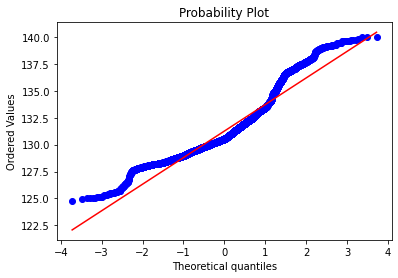

In [56]:
# Plot the high values of the DataFrame using a probability plot

scipy.stats.probplot(df.high,plot=pylab)
pylab.show()

In [57]:
# Run the augmented Dickey-Fuller test on the high values of the DataFrame

sts.adfuller(df.high)

(-1.6780492580379704,
 0.44245616209458877,
 3,
 6995,
 {'1%': -3.431285196760183,
  '5%': -2.8619532817881064,
  '10%': -2.566989985928885},
 -10753.30029666773)

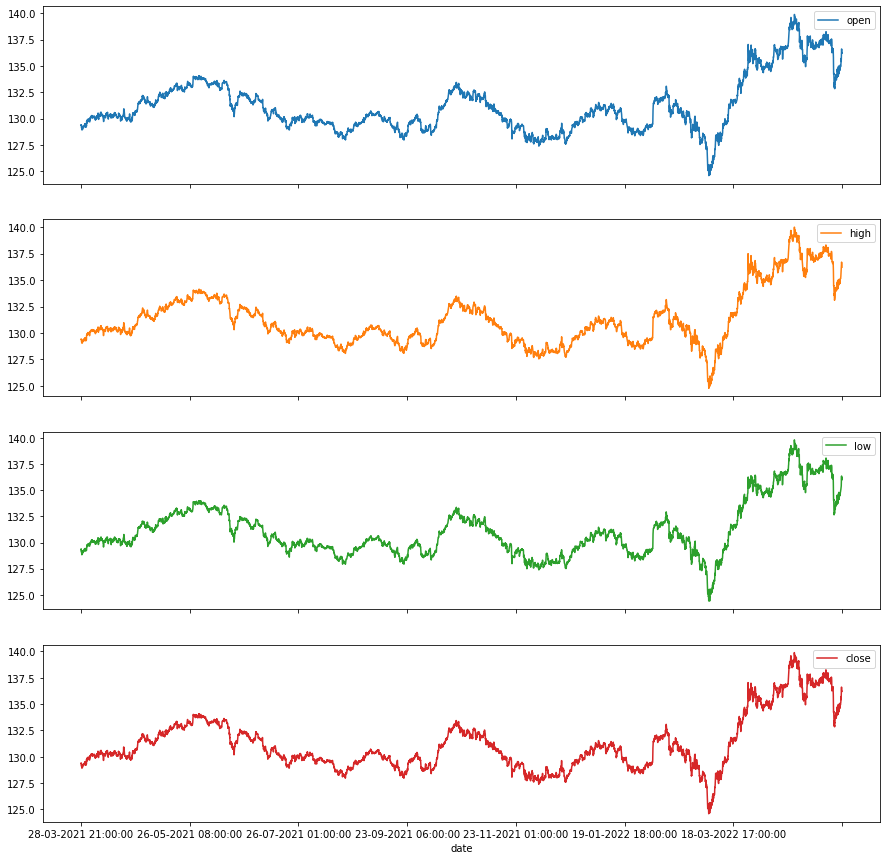

In [58]:
# Plot the DataFrame

df.plot(figsize=(15,15),subplots=True)

plt.show()

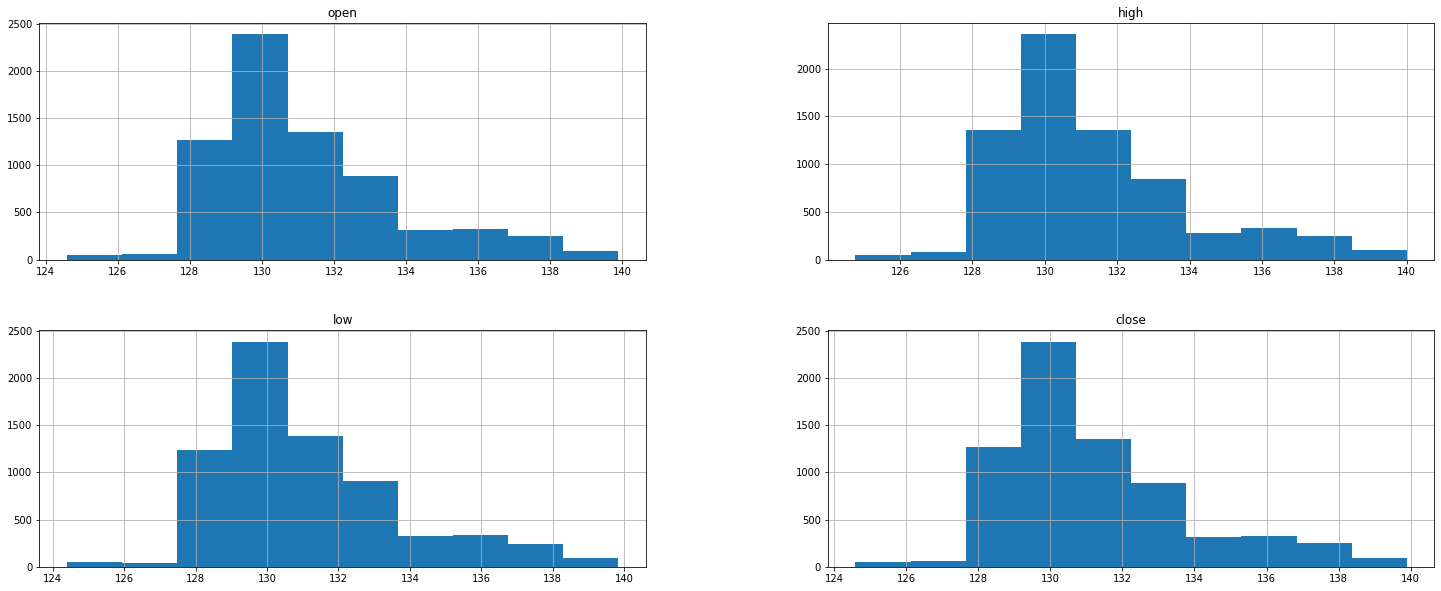

In [59]:
# Plot a histogram of the DataFrame

df.hist(figsize=(25,10))

plt.show()

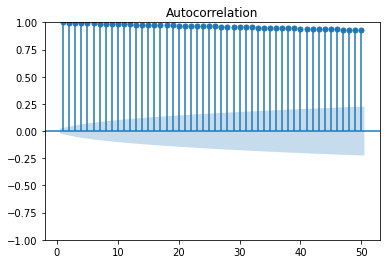

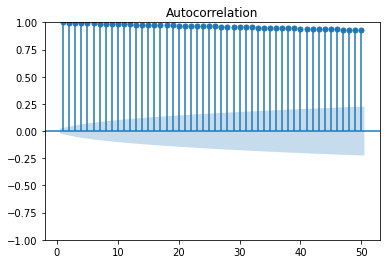

In [60]:
# Plot the autocorrelation of the high values of the DataFrame

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.high,lags=50,zero=False)


In [61]:
# Set the lag and training split

lag=3
train_split = int(len(df)*0.8)
train_split

5599

In [62]:
# Convert the DataFrame to a numpy array

df=np.array(df)

In [63]:
# Define a function to create multivariate data

def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [64]:
# Set the number of steps, past history, and step size for the multivariate data

n_step = 1
past_history = lag
n_step= 1
STEP = 1

In [65]:
# Split dataset into training and testing sets

x_train_single, y_train_single = multivariate_data(df, df[:, 0], 0,
                                                   train_split, past_history,
                                                   n_step, STEP,
                                                   single_step=True)
x_test_single, y_test_single = multivariate_data(df, df[:, 0],
                                               train_split, None, past_history,
                                               n_step, STEP,
                                               single_step=True)

In [66]:
# Print the shapes of the training and testing sets

print(x_train_single.shape)
print(x_test_single.shape)

(5596, 3, 4)
(1396, 3, 4)


In [67]:
print(y_train_single.shape)
print(y_test_single.shape)

(5596,)
(1396,)


In [68]:
# Print the first sample of the training set

x_train_single[0,:,0:7]

array([[129.38  , 129.4125, 129.3465, 129.3675],
       [129.366 , 129.4235, 129.3045, 129.4225],
       [129.422 , 129.4335, 129.378 , 129.4195]])

#scaling data

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
# Create a dictionary to store scalers for each feature

scalers = {}
for i in range(x_train_single.shape[1]):
    scalers [i]= MinMaxScaler(feature_range=(0,1))
    x_train_single[:, i, :] = scalers[i].fit_transform(x_train_single[:, i, :]) 

for i in range(x_test_single.shape[1]):
    x_test_single[:, i, :] = scalers[i].transform(x_test_single[:, i, :]) 

In [71]:
# Print the first sample of the training set after scaling

x_train_single[0,:,0:7]

array([[0.2971215 , 0.28353218, 0.29608939, 0.29526088],
       [0.29502804, 0.28520404, 0.28974785, 0.30348333],
       [0.30340187, 0.28672392, 0.30084554, 0.30303483]])

In [72]:
# Print the shape of the last two dimensions of the training set

x_train_single.shape[-2:]

(3, 4)

In [73]:
# Scale the target variables using MinMaxScaler


y_train_single=y_train_single.reshape(-1,1)

y_test_single=y_test_single.reshape(-1,1)


scaler =MinMaxScaler(feature_range=(0,1))
y_train_single=scaler.fit_transform(y_train_single)
y_test_single=scaler.transform(y_test_single)

# Modeling

In [107]:
from keras.models import Sequential

from keras.layers import LSTM,Dense,GRU,SimpleRNN,Flatten,Dropout

import tensorflow as tf

# RNN

In [103]:
# Define RNN model architecture

RNN_model = Sequential()
RNN_model.add(SimpleRNN(50,input_shape=x_train_single.shape[-2:],activation='relu',return_sequences=True,kernel_regularizer='l2'))
RNN_model.add(Dropout(0.3))

RNN_model.add(SimpleRNN(50,activation='relu',kernel_regularizer='l2'))
RNN_model.add(Dropout(0.3))

RNN_model.add(Dense(n_step,activation='selu'))

RNN_model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [108]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

history=RNN_model.fit(x_train_single,y_train_single,epochs=100,batch_size=16,
              validation_data=(x_test_single,y_test_single),callbacks=[tensorboard_callback])
print(history.history) # this will print a dictionary object, now you need to grab the metrics / score you're looking for

# if your score == 'acc', if not replace 'acc' with your metric

best_score = max(history.history['val_accuracy'])

print(f"Best Validation score is: {best_score}")

Epoch 1/100
350/350 [==============================] - 6s 10ms/step - loss: 0.2478 - accuracy: 3.5740e-04 - val_loss: 0.1047 - val_accuracy: 0.0000e+00
Epoch 2/100
350/350 [==============================] - 3s 9ms/step - loss: 0.0480 - accuracy: 3.5740e-04 - val_loss: 0.0524 - val_accuracy: 0.0000e+00
Epoch 3/100
350/350 [==============================] - 4s 12ms/step - loss: 0.0193 - accuracy: 3.5740e-04 - val_loss: 0.0381 - val_accuracy: 0.0000e+00
Epoch 4/100
350/350 [==============================] - 3s 9ms/step - loss: 0.0102 - accuracy: 3.5740e-04 - val_loss: 0.0388 - val_accuracy: 0.0000e+00
Epoch 5/100
350/350 [==============================] - 3s 9ms/step - loss: 0.0068 - accuracy: 3.5740e-04 - val_loss: 0.0358 - val_accuracy: 0.0000e+00
Epoch 6/100
350/350 [==============================] - 3s 9ms/step - loss: 0.0058 - accuracy: 3.5740e-04 - val_loss: 0.0457 - val_accuracy: 0.0000e+00
Epoch 7/100
350/350 [==============================] - 6s 16ms/step - loss: 0.0050 - accurac

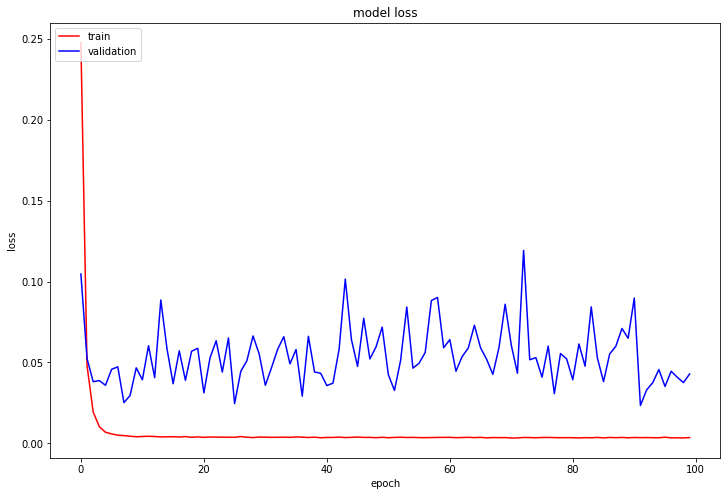

In [109]:
# Visualize model loss

plt.figure(figsize=(12,8))

plt.plot(history.history['loss'], c='r')


plt.plot(history.history['val_loss'], c='b')

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train','validation'], loc='upper left')

plt.show()

In [110]:
#predict test set

pred_rnn=RNN_model.predict(x_test_single)

44/44 [==============================] - 0s 2ms/step


In [111]:
# Compute MSE of prediction
from sklearn.metrics import mean_squared_error

mse_rnn = mean_squared_error(y_test_single,pred_rnn)
mse_rnn

0.042132947044965945

In [112]:
#inverse Prediction

predict_RNN_inv = scaler.inverse_transform(pred_rnn)

y_test_inv = scaler.inverse_transform(y_test_single)

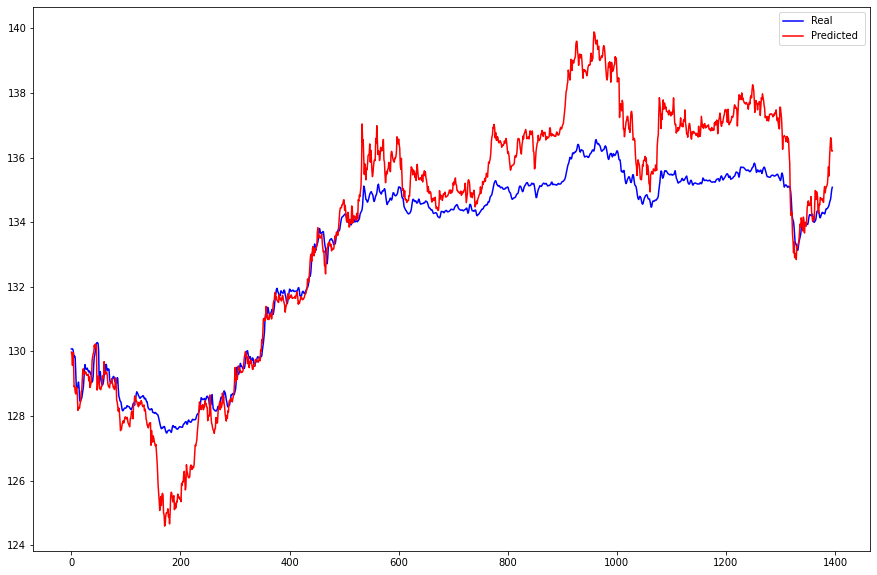

In [113]:
# Visualize prediction results

fig = plt.figure(figsize = (15,10))
plt.plot(predict_RNN_inv, color='b', label='Real ')
plt.plot(y_test_inv, color='r', label='Predicted ')
plt.legend()
plt.show()

In [114]:
# predict one step
input_samples=x_test_single[-1:,:,:]

input_samples

array([[[1.33233645, 1.38110799, 1.33489355, 1.37905517],
        [1.37936449, 1.39091116, 1.35739091, 1.37546718],
        [1.37585047, 1.38034805, 1.29775026, 1.3177605 ]]])

In [115]:
next_step_rnn = RNN_model.predict(input_samples)

next_step_rnn

1/1 [==============================] - 0s 22ms/step


array([[1.1500335]], dtype=float32)

# LSTM

In [116]:
LSTM_model = Sequential()

LSTM_model.add(LSTM(50,input_shape=x_train_single.shape[-2:],activation='relu',return_sequences=True))
LSTM_model.add(Dropout(0.3))

LSTM_model.add(LSTM(50,activation='relu',kernel_regularizer='l2'))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(Dense(n_step,activation='selu'))
LSTM_model.compile(optimizer='adam', loss='mse')

In [117]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

history_LSTM=LSTM_model.fit(x_train_single,y_train_single,
                                            epochs=100,batch_size=16,validation_data=(x_test_single,y_test_single),callbacks=[tensorboard_callback])

# This will print a dictionary object, now you need to grab the metrics / score you're looking for
print(history.history) 

best_score = max(history.history['val_accuracy'])

print(f"Best Validation score is: {best_score}")

Epoch 1/100
350/350 [==============================] - 12s 24ms/step - loss: 0.1283 - val_loss: 0.1089
Epoch 2/100
350/350 [==============================] - 9s 26ms/step - loss: 0.0057 - val_loss: 0.0503
Epoch 3/100
350/350 [==============================] - 6s 16ms/step - loss: 0.0046 - val_loss: 0.0159
Epoch 4/100
350/350 [==============================] - 7s 19ms/step - loss: 0.0042 - val_loss: 0.0389
Epoch 5/100
350/350 [==============================] - 6s 16ms/step - loss: 0.0039 - val_loss: 0.0273
Epoch 6/100
350/350 [==============================] - 7s 19ms/step - loss: 0.0038 - val_loss: 0.0610
Epoch 7/100
350/350 [==============================] - 5s 16ms/step - loss: 0.0037 - val_loss: 0.0157
Epoch 8/100
350/350 [==============================] - 7s 19ms/step - loss: 0.0035 - val_loss: 0.0494
Epoch 9/100
350/350 [==============================] - 6s 16ms/step - loss: 0.0036 - val_loss: 0.0171
Epoch 10/100
350/350 [==============================] - 7s 19ms/step - loss: 0.00

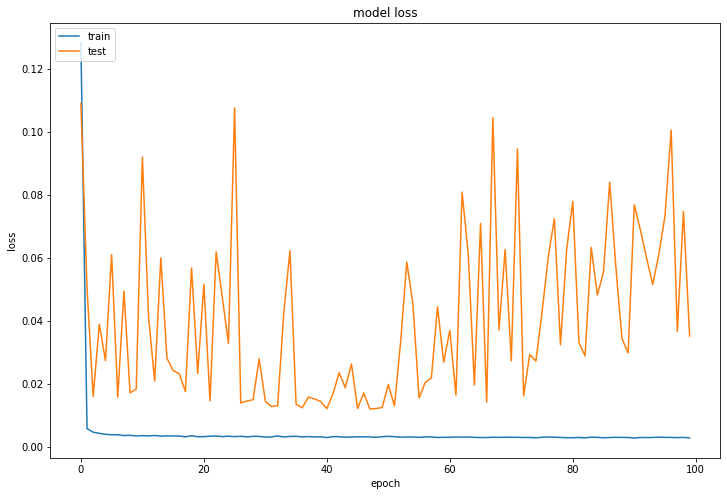

In [118]:
# Visualize model loss

plt.figure(figsize=(12,8))
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [119]:
pred_lstm=LSTM_model.predict(x_test_single)


44/44 [==============================] - 1s 4ms/step


In [120]:
#0.01475832806648973

mse_LSTM= mean_squared_error(y_test_single, pred_lstm)
mse_LSTM

0.03469288917288377

In [121]:
predict_LSTM_inv=scaler.inverse_transform(pred_lstm)

y_test_single_inv=scaler.inverse_transform(y_test_single)

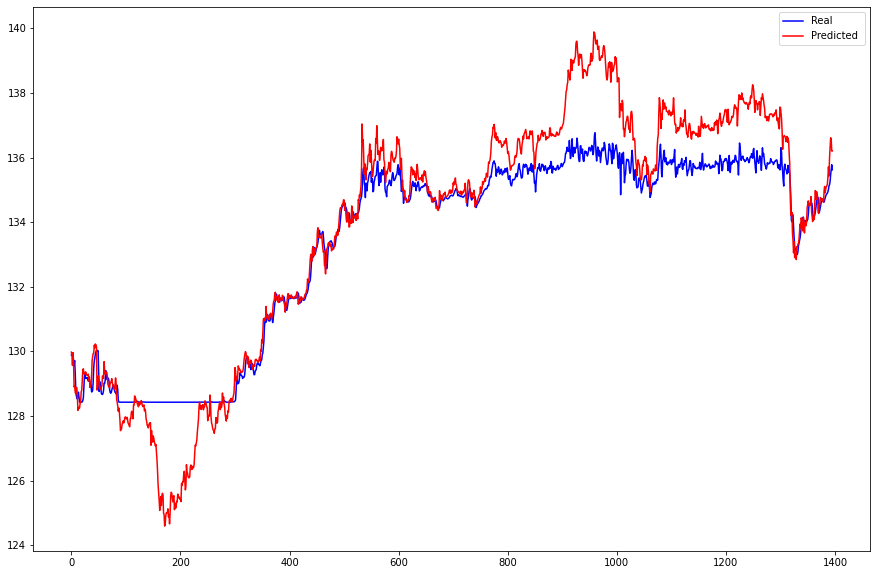

In [122]:
fig = plt.figure(figsize = (15,10))
plt.plot(predict_LSTM_inv, color='b', label='Real ')
plt.plot(y_test_single_inv, color='r', label='Predicted ')
plt.legend()

# GRU

In [94]:
GRU_model = Sequential()
GRU_model.add(GRU(50,input_shape=x_train_single.shape[-2:],activation='relu',return_sequences=True,kernel_regularizer='l2'))
GRU_model.add(Dropout(0.3))

GRU_model.add(GRU(50,activation='relu',kernel_regularizer='l2'))
GRU_model.add(Dropout(0.3))

GRU_model.add(Dense(n_step,activation='selu'))
GRU_model.compile(optimizer='adam', loss='mse')

In [95]:
history_GRU=GRU_model.fit(x_train_single,y_train_single,
                                            epochs=100,batch_size=16,validation_data=(x_test_single,y_test_single))

Epoch 1/100
350/350 [==============================] - 12s 19ms/step - loss: 0.1623 - val_loss: 0.0281
Epoch 2/100
350/350 [==============================] - 8s 22ms/step - loss: 0.0118 - val_loss: 0.0365
Epoch 3/100
350/350 [==============================] - 6s 18ms/step - loss: 0.0083 - val_loss: 0.0377
Epoch 4/100
350/350 [==============================] - 7s 21ms/step - loss: 0.0071 - val_loss: 0.0297
Epoch 5/100
350/350 [==============================] - 7s 21ms/step - loss: 0.0069 - val_loss: 0.0403
Epoch 6/100
350/350 [==============================] - 6s 18ms/step - loss: 0.0064 - val_loss: 0.0270
Epoch 7/100
350/350 [==============================] - 8s 21ms/step - loss: 0.0067 - val_loss: 0.0485
Epoch 8/100
350/350 [==============================] - 6s 18ms/step - loss: 0.0063 - val_loss: 0.0172
Epoch 9/100
350/350 [==============================] - 8s 21ms/step - loss: 0.0060 - val_loss: 0.0423
Epoch 10/100
350/350 [==============================] - 7s 19ms/step - loss: 0.00

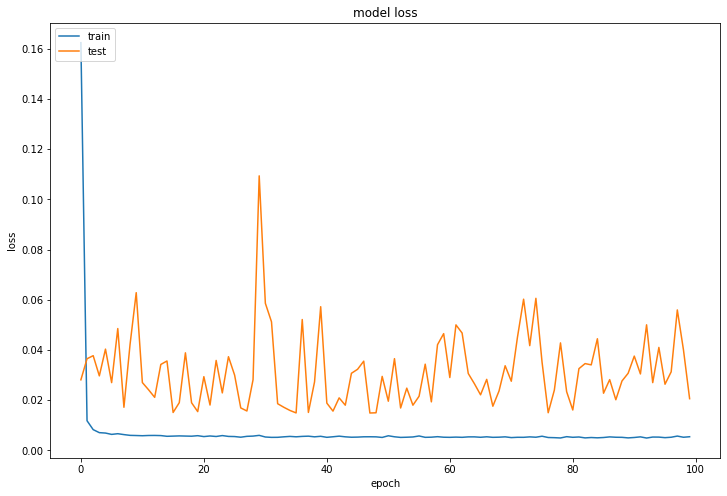

In [97]:
plt.figure(figsize=(12,8))
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [98]:
predict_GRU=GRU_model.predict(x_test_single)

44/44 [==============================] - 1s 5ms/step


In [100]:
mse_GRU= mean_squared_error(y_test_single, predict_GRU)
mse_GRU

0.019716882253307432

In [101]:
predict_GRU_inv=scaler.inverse_transform(predict_GRU)

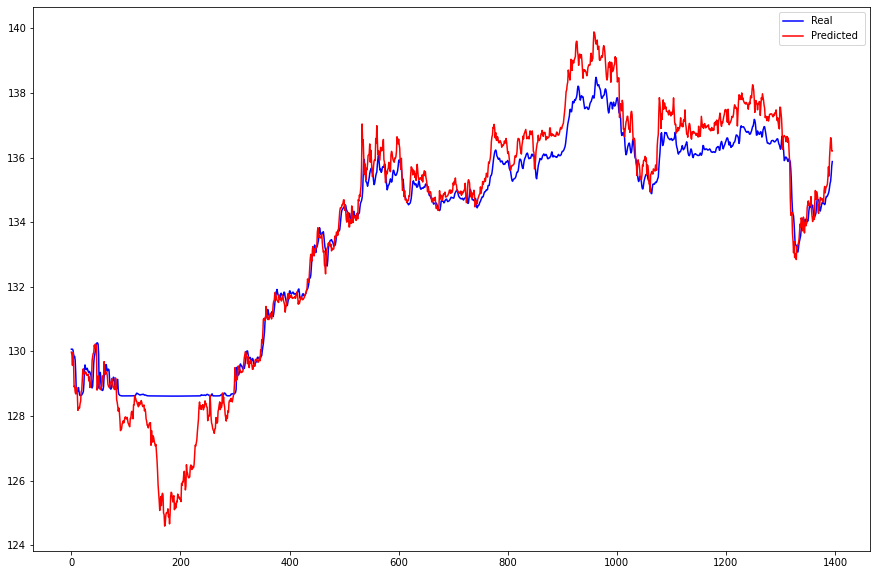

In [102]:
fig = plt.figure(figsize = (15,10))
plt.plot(predict_GRU_inv, color='b', label='Real ')
plt.plot(y_test_single_inv, color='r', label='Predicted ')
plt.legend()